# Google Colab

https://colab.research.google.com/drive/1WWtCtCQGLN9HyxVm9_1OGjTrB5Vm5h-P

## Bitcoin Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing Necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.express as px

In [ ]:
#This task is for colab only
#Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'


## Importing the Dataset & Exploring it

In [ ]:
from google.colab import files
files.upload()

Saving bitcoin_data.csv to bitcoin_data.csv


{'bitcoin_data.csv': b'Date,Close\r\n1/1/2016,435.66\r\n1/2/2016,435.4\r\n1/3/2016,431.91\r\n1/4/2016,433.85\r\n1/5/2016,433.34\r\n1/6/2016,430.87\r\n1/7/2016,459.07\r\n1/8/2016,454.44\r\n1/9/2016,450.38\r\n1/10/2016,449.99\r\n1/11/2016,449.19\r\n1/12/2016,434.01\r\n1/13/2016,432.77\r\n1/14/2016,430.03\r\n1/15/2016,357.53\r\n1/16/2016,388.7\r\n1/17/2016,378.46\r\n1/18/2016,384.89\r\n1/19/2016,375.27\r\n1/20/2016,418.54\r\n1/21/2016,409.38\r\n1/22/2016,382.9\r\n1/23/2016,387.5\r\n1/24/2016,403.05\r\n1/25/2016,391.4\r\n1/26/2016,391.54\r\n1/27/2016,394.79\r\n1/28/2016,379.61\r\n1/29/2016,378.68\r\n1/30/2016,378.46\r\n1/31/2016,367.95\r\n2/1/2016,371.33\r\n2/2/2016,372.93\r\n2/3/2016,368.87\r\n2/4/2016,387.99\r\n2/5/2016,384.5\r\n2/6/2016,375.44\r\n2/7/2016,377.49\r\n2/8/2016,371.14\r\n2/9/2016,372.68\r\n2/10/2016,378.44\r\n2/11/2016,378.23\r\n2/12/2016,382.05\r\n2/13/2016,391\r\n2/14/2016,406.59\r\n2/15/2016,398.95\r\n2/16/2016,407.42\r\n2/17/2016,415.2\r\n2/18/2016,421.19\r\n2/19/2016,4

In [ ]:
#read_csv function from pandas

In [ ]:
df = pd.read_csv('bitcoin_data.csv')
df

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [ ]:
#note for fbprophet the price data must be a float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1705 non-null   object 
 1   Close   1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [ ]:
df.describe()

,Close
count,1705.000000
mean,5455.314499
std,3962.263892
min,357.530000
25%,1062.150000
50%,6005.050000
75%,8624.280000
max,19650.010000


# Data Visualization

In [ ]:
# Area graph (Date Vs Price)

px.area(df, x='Date', y="Close")

In [ ]:
# Violin plot

px.violin(df, y="Close")

# Creating Facebook Prophet Model

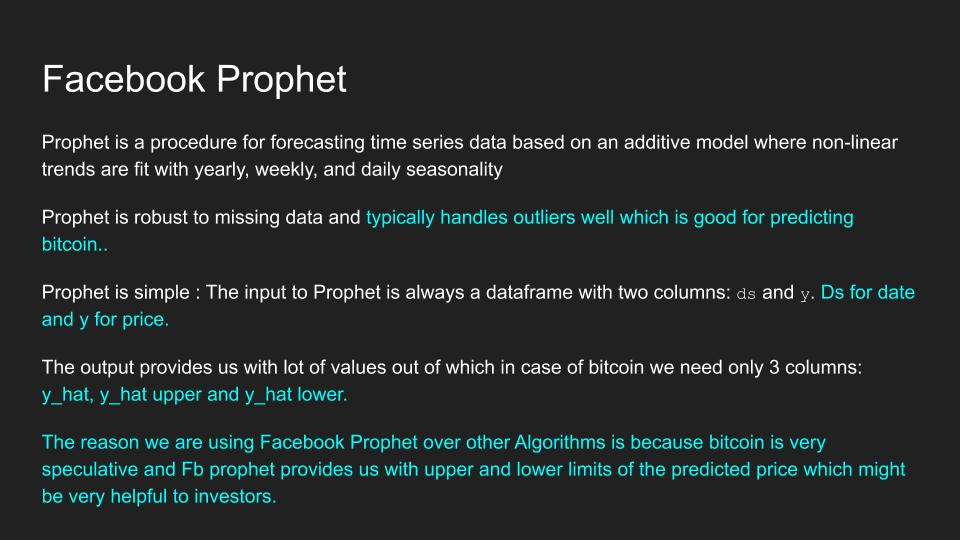

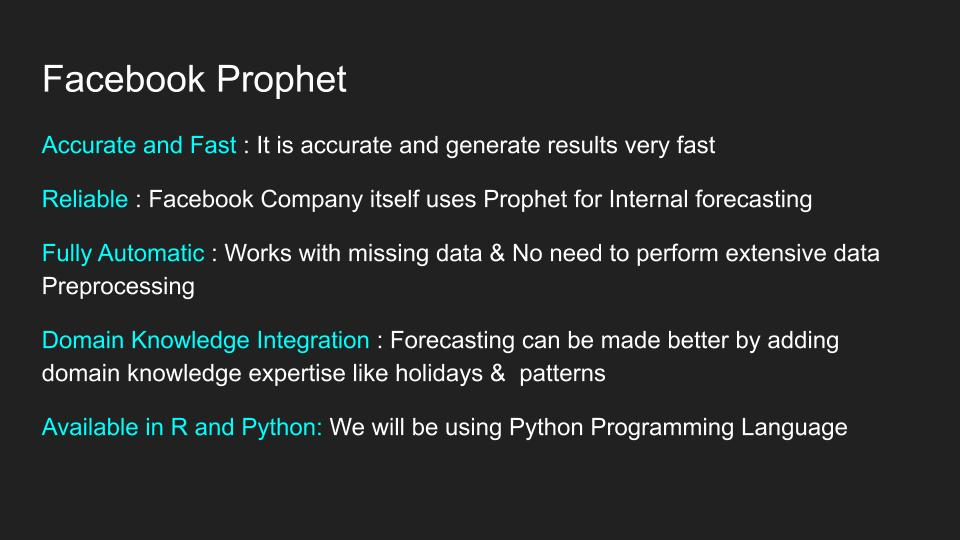

## Data Preperation

In [ ]:
df.columns

Index(['Date', 'Close'], dtype='object')

In [ ]:
# rename the columns
prophet_df = df.rename(columns={'Date':"ds", 'Close':'y'})

In [ ]:
prophet_df

,ds,y
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


## Modelling

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiobpzpnd/77wr97d4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiobpzpnd/2oq84saq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15368', 'data', 'file=/tmp/tmpiobpzpnd/77wr97d4.json', 'init=/tmp/tmpiobpzpnd/2oq84saq.json', 'output', 'file=/tmp/tmpiobpzpnd/prophet_model18nym07j/prophet_model-20230830030447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:04:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:04:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,1048.554009,-182.232631,2889.213271,1048.554009,1048.554009,301.437285,301.437285,301.437285,-3.420223,-3.420223,-3.420223,304.857508,304.857508,304.857508,0.0,0.0,0.0,1349.991294
1,2016-01-02,1044.479053,-148.797265,2757.328219,1044.479053,1044.479053,283.197371,283.197371,283.197371,15.250031,15.250031,15.250031,267.947340,267.947340,267.947340,0.0,0.0,0.0,1327.676424
2,2016-01-03,1040.404098,-147.236666,2738.388471,1040.404098,1040.404098,224.315459,224.315459,224.315459,-8.873526,-8.873526,-8.873526,233.188986,233.188986,233.188986,0.0,0.0,0.0,1264.719557
3,2016-01-04,1036.329142,-232.531282,2708.002492,1036.329142,1036.329142,219.487267,219.487267,219.487267,18.715110,18.715110,18.715110,200.772157,200.772157,200.772157,0.0,0.0,0.0,1255.816409
4,2016-01-05,1032.254187,-138.043625,2542.390391,1032.254187,1032.254187,166.392322,166.392322,166.392322,-4.365338,-4.365338,-4.365338,170.757660,170.757660,170.757660,0.0,0.0,0.0,1198.646509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2020-09-26,9024.383713,7432.946867,10371.839818,8967.951371,9061.404082,-55.411600,-55.411600,-55.411600,15.250031,15.250031,15.250031,-70.661631,-70.661631,-70.661631,0.0,0.0,0.0,8968.972113
1731,2020-09-27,9024.729984,7517.176025,10312.045788,8963.430339,9066.922458,-119.073351,-119.073351,-119.073351,-8.873526,-8.873526,-8.873526,-110.199824,-110.199824,-110.199824,0.0,0.0,0.0,8905.656634
1732,2020-09-28,9025.076256,7533.024681,10268.866454,8958.167107,9072.690003,-130.763707,-130.763707,-130.763707,18.715110,18.715110,18.715110,-149.478816,-149.478816,-149.478816,0.0,0.0,0.0,8894.312549
1733,2020-09-29,9025.422527,7395.210508,10298.791042,8949.127585,9078.113583,-192.554171,-192.554171,-192.554171,-4.365338,-4.365338,-4.365338,-188.188832,-188.188832,-188.188832,0.0,0.0,0.0,8832.868356


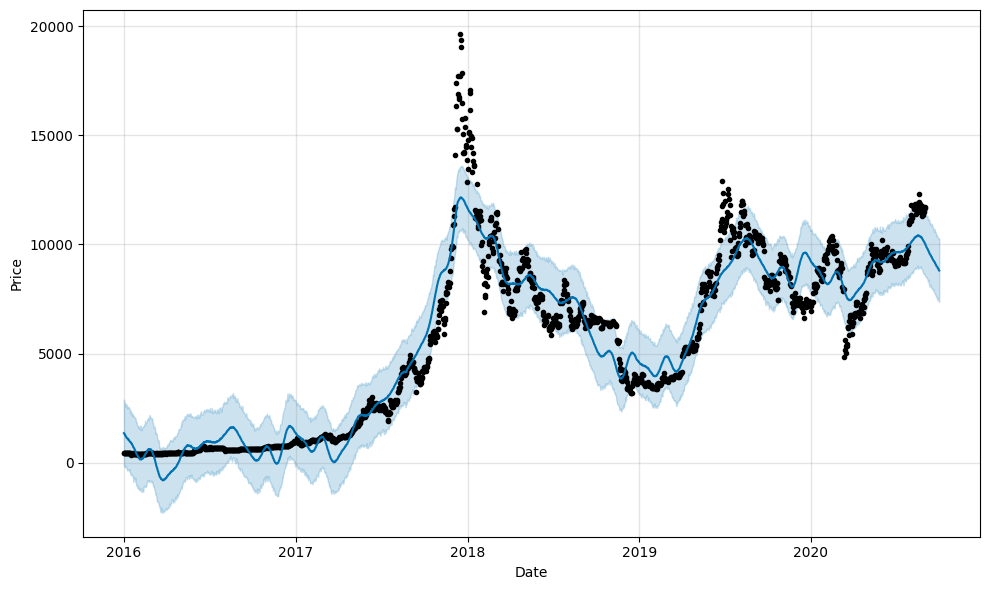

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

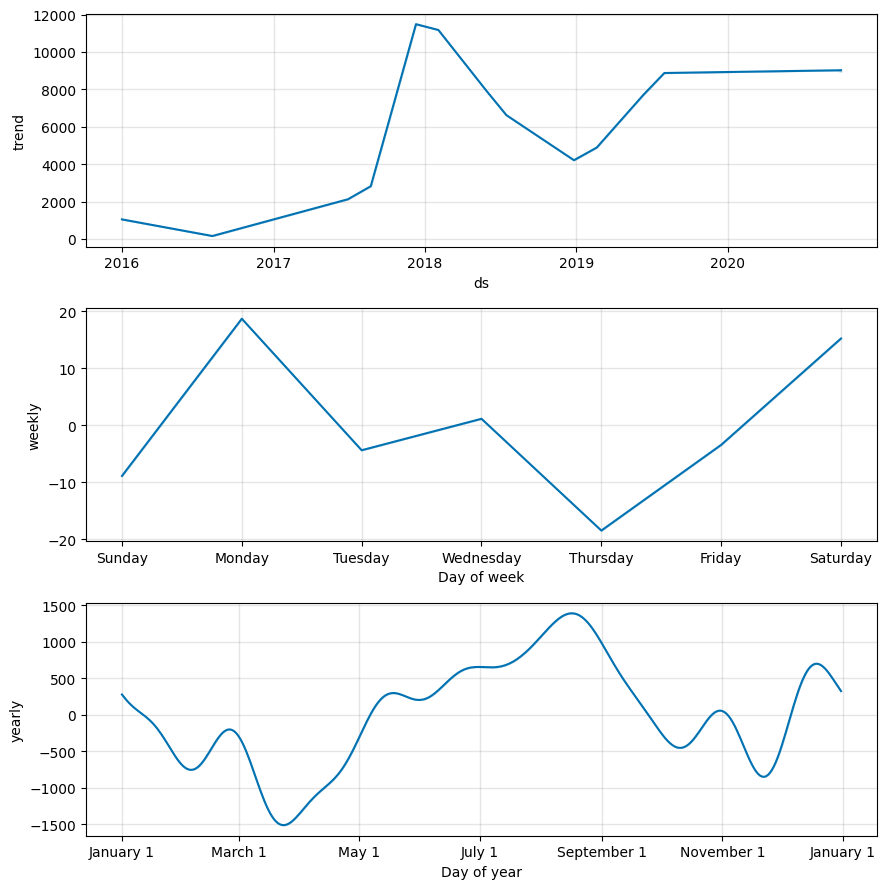

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
forecast.to_csv("forecast.csv")
from google.colab import files
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>